# Shadow Distributions 

Heather Bergey

# I. Knots and Smoothing
***

## What is a knot?

A knot is a closed loop in 3-space

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/fc/Trefoil_Knot.gif "Trefoil knot 3D")

## A Knot diagram

...is a projection of a knot onto a plane

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Trefoil_knot_left.svg/250px-Trefoil_knot_left.svg.png "Trefoil knot projection")

## Shadow of a knot

A shadow is a projection of a given knot that shows no crossing information 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/trefoil.png?raw=true "Trefoil shadow")

### Side note on uniqueness of shadows

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Unknots.svg/364px-Unknots.svg.png?raw=true "Unknot")



# II. Smoothing
***

## Smoothing

To smooth a crossng is to replace a crossing in a shadow by one of the two ways shown below: 
![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/smoothing.JPG?raw=true "Smoothing a crossing")<insert smoothing a crossing photo>

## Smoothing Process for a trefoil

For a shadow of a knot with $3$ crossings, there are $2^3=8$ outcomes of the smoothing process ranging from $1$ to $3$ components. In general, for $n$ crossings, there are $2^n$ outcomes.

<img src="https://github.com/allenjstewart/Shadow_Distributions/blob/master/outcomes.png?raw=true" width="550" height="350" />


We can then create a histogram of the outcomes of the smoothing process. 

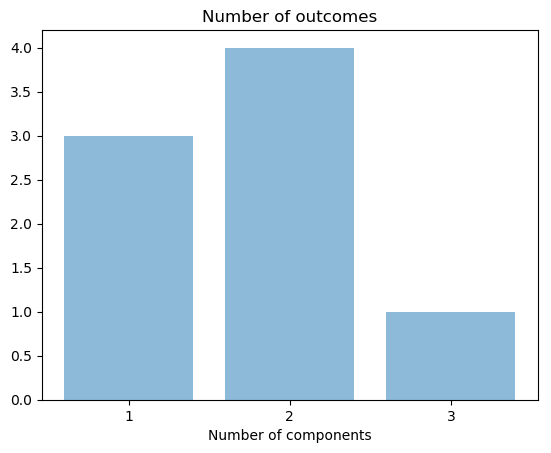

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
outcomes = ('1', '2', '3')
y_pos = np.arange(len(outcomes))
dist = [3,4,1]
 
plt.bar(y_pos, dist, align='center', alpha=0.5)
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Number of outcomes')

plt.show()

Dividing by the number of outcomes <8> gives the probability of winding up with $x$ components.

In [26]:
%%capture
outcomes = ('1', '2', '3')
y_pos = np.arange(len(outcomes))
dist = [3/8,4/8,1/8]
 
plt.bar(y_pos, dist, align='center', alpha=0.5)
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Probability')
plt.ylim(ymax=1)

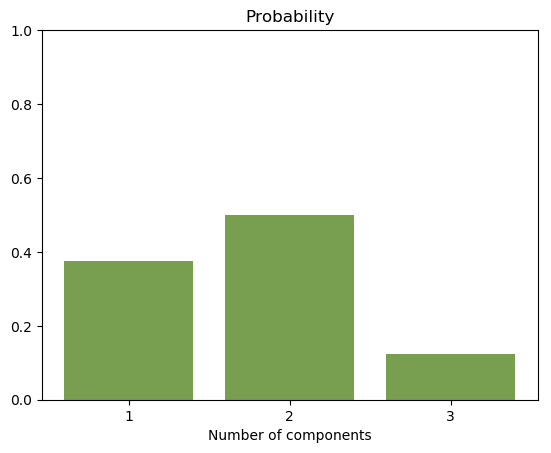

In [27]:
plt.show()

### Goal: Find the probabilities for the union of $n$ shadows

# III. Unions
***

## What is a union?

A union is created from a number of shadows where the shadows have no intersections. Below is the union of two shadows. 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/union.png?raw=true "Union of two trefoils")


Using just the probabilities for one trefoil, we can find the probabilities for the union of $n$ trefoils.

In [34]:
%%capture
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

iniDist = np.array([3/8,4/8,1/8])          #Enter probabilities for a given shadow
nCrossings = 3                             #Enter number of crossings
nKnots = 2                                 #Enter number of shadows
prevKnots = iniDist
bigKnots = iniDist


for a in range(0, nKnots):
    if a == 1:
        bigKnots = iniDist
    elif a > 1:
        prevKnots = bigKnots
    
    bigKnots = np.concatenate((np.zeros(len(prevKnots)),np.zeros(len(iniDist))),axis=0)
    for k in range(0,nKnots*len(iniDist)):
        for n in range(0,len(prevKnots)):
            for m in range(0,len(iniDist)):
                if n + m == k:
                    bigKnots[k+1] = bigKnots[k+1] + prevKnots[n]*iniDist[m]

# Indexing outcomes
outcomes = np.zeros(nKnots*nCrossings)
for i in range(0,nKnots*nCrossings):
    outcomes[i] = i+1
    
# Distribution    
y_pos = np.arange(len(outcomes))
dist = list(bigKnots)


# Mean    
total = np.sum(bigKnots)    
mean = np.dot(outcomes,bigKnots)/total


plt.bar(y_pos, dist, align='center', alpha=0.5, color='y')
plt.axvline(x = mean - 1, color='0')            #-1 because indexing
plt.legend(['mean'])
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Probability')

Probabilities for 2 shadows
[0.0, 0.140625, 0.375, 0.34375, 0.125, 0.015625]
Mean for discrete distribution of 2 shadows: 3.5.


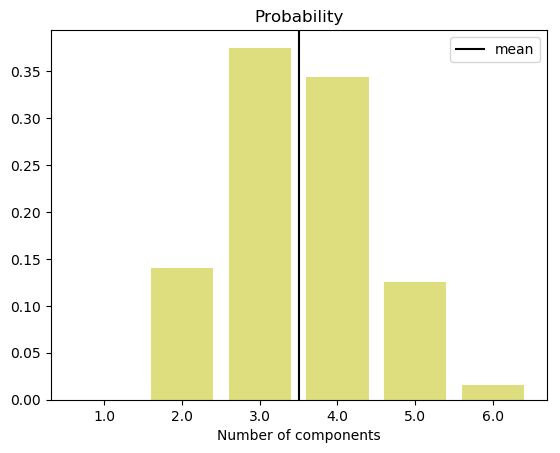

In [35]:
print('Probabilities for ' + repr(nKnots) + ' shadows')
print(list(bigKnots))
print('Mean for discrete distribution of ' + repr(nKnots) + ' shadows: ' + repr(mean) +'.')

plt.show()

# V. The mean $\mu$
<Then same chart but mean/nShadows>

|$Number$ $of$ $Knots$ |     $\mu$     | 
|:---------------:|:-------------:|
| 1               | $1.75$        |
| 2               | $3.5$         |             
| 3               | $5.25$        |             
| 4               | $7$           |             
| ...             | ...           |          
| $\infty$        | $\infty$      |

<We see that $\mu$ goes to $\infty$ as number of knots increases to infinity NOT SURPRISING>

|$Number$ $of$ $Knots$ |     $\frac{\mu}{nKnots}$     | 
|:---------------:|:-------------:|
| 1               | $1.75$        |
| 2               | $1.75$        |             
| 3               | $1.75$        |             
| 4               | $1.75$        |             
| ...             | ...           |          
| $\infty$        | $1.75$        |

<We see that $\mu$ goes to $\infty$ as number of knots increases to infinity NOT SURPRISING>

### Bigger goal: Find the distribution for the union of $n$ shadows for any given shadow

For this, we must know the distribution of a shadow for a single knot. For the trefoil, it was simple enough to solve each case but for more complicated knots......<if you have a knot with 5 crossings, there are now 2^5 possible outcomes so this grows pretty fast as knots get more complicated>

# IV. Finding Distributions for the shadow of any given knot 
***

## What does graph theory have to do with it?

We can construct the medial graph of a knot introduced by Peter Tait in 1877 and its dual. We input information into code to find the histogram (and can easily find then the probability distribution.

INSERT PICTURE SHOW EDGES/DUAL GRAPHS FOR FIGURE 8 KNOT

In [12]:
import numpy as np

#Figure 8
vertices = 3;      
dualVertices = 3;     
edges = np.array([[0,1],[1, 2],[2,0],[0,1]]);      
dualEdges = np.array([[3,4],[3,5],[3,5],[4,5]]);


#Figure 8 edges: [0,1],[1, 2],[2,0],[0,1]
#Figure 8 dualEdges: [3,4],[3,5],[3,5],[4,5]


#KNOTS WITH 2 DUALVERTICES
#__________________________
#Trefoil edges: [0,1],[1, 2],[2,0]
#Trefoil dualEdges: [3,4],[3,4],[3,4]

#Cinquefoil edges: [0,1],[1, 2],[2,3],[3,4],[4,0]
#Cinquefoil dualEdges: [5,6],[5,6],[5,6],[5,6],[5,6]

#Septafoil edges: [0,1],[1, 2],[2,3],[3,4],[4,5],[5,6],[6,0]
#Septafoil dualEdges: [7,8],[7,8],[7,8],[7,8],[7,8],[7,8],[7,8]

#"Ninefoil" edges: [0,1],[1, 2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,0]
#"Ninefoil" dualEdges: [9,10],[9,10],[9,10],[9,10],[9,10],[9,10],[9,10],[9,10],[9,10]


dist = np.zeros(np.maximum(vertices, dualVertices));
B = np.zeros(len(edges));
outcome = 0;
for j  in range(0, 2**len(B)):
	B = np.zeros(len(edges));
	for k in range(0, len(np.fromstring(' '.join(np.binary_repr(j)), dtype=int, sep=' '))):
		B[k] = np.fromstring(' '.join(np.binary_repr(j)), dtype=int, sep=' ')[k];
	A = np.identity(vertices + dualVertices);
	for i in range(0, len(edges)):
		if(B[i] == 1): 
			A[edges[i,0], edges[i,1]] = A[edges[i,0], edges[i,1]] + 1;  
		else:
			A[dualEdges[i,0], dualEdges[i,1]] = A[dualEdges[i,0], dualEdges[i,1]] + 1;
			
		A[edges[i,1], edges[i,0]] = A[edges[i,0], edges[i,1]];
		A[dualEdges[i,1], dualEdges[i,0]] = A[dualEdges[i,0], dualEdges[i,1]];
	APower = np.heaviside(np.linalg.matrix_power(A, vertices),0);
	outcome = np.linalg.matrix_rank(APower) - 1;
	if(outcome > len(dist)): 
		np.concatenate(dist, [0],axis=0)
	for i in range(1,len(dist)+1):
		if(outcome == i):
			dist[i-1] = dist[i-1] + 1;
            
print('Histogram')
print(dist)

Histogram
[5. 8. 3.]



## Multinomial Distribution

The multinomial distribution is one which we assign our probabilities as the coefficients of terms in a multinomial. For our problem, we can then raise this multinomial to the number of knots. The coefficients then tell us the number of outcomes for a certain number of components.
#### Example
Recall that the probabilities for a trefoil knot were $1,2,$ and $3$ components for probabilities of $\frac{3}{8},\frac{4}{8},$ and $\frac{1}{8}$ respectively. 

If we let $x^i$ represent $i$ components, we get the multinomial

\begin{align}
\frac{3}{8}x^1 + \frac{4}{8}x^2 + \frac{1}{8}x^3
\end{align}

Then the coefficients of $(\frac{3}{8}x^1 + \frac{4}{8}x^2 + \frac{1}{8}x^3)^n$ expanded gives us the number of outcomes for $i$ components.

If $n=2$, we get the multinomial $\frac{0}{64}x^1+\frac{9}{64}x^2+\frac{24}{64}x^3+\frac{22}{64}x^4+\frac{8}{64}x^5+\frac{1}{64}x^6$. 

Recall probabilities for the union of $2$ trefoil shadows were $1, 2, 3, 4, 5,$ and $6$ components for probabilities of $\frac{0}{64},\frac{9}{64},\frac{24}{64},\frac{22}{64},\frac{8}{64},\frac{1}{64}$ respectively. 

# VI. Linear Connected Sums
***

## What is composition?

A composition of diagrams can be created from multiple shadows by removing a small arc from each, then connecting the four endpoints by two new arcs.

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/composition.png?raw=true "Composition of two trefoils")

## What is a linear connected sum?

A connected sum is the composition of multiple shadows in a linear way. 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/composition_multiple_trefoils.JPG?raw=true "Linear composition of multiple shadows")


## Extenstion of the Multinomial Distribution

<The multinomial distribution has an easy extension from unions to compositions.>For linear connected sums we simply take the multinomial from the union of $n$ number of shadows and divide by $x^{n-1}$. <this is because you are merging one region with another region>
    
\begin{align}
    \frac{(\frac{3}{8}x^1 + \frac{4}{8}x^2 + \frac{1}{8}x^3)^n}{x^{n-1}}
\end{align}


For $i$ in $x^i$ representing the number of components, this resulting multinomial's coefficients gives us the probabilities for $i$ number of components. 

# V. Theorems & Conjectures

***

### Torus Knots Mean Theorem. The mean $\mu$ for a torus knot with $n$ crossings is $2^{1-n}+\frac{n}{2}$. 



### Conjecture. Given a distribution for a shadow of a knot, we say that $D_1 \leq D_2$ if each for each coefficient $p$ in the respective multinomial distribution, it is true that $p_1 \leq p_2$.


### Conjecture. The minimal distribution for a shadow of any given knot gives a mean $\mu$ which is an invariant.

<recall that knots do not have unique shadows>

# VI. A look ahead
***

### Nonlinear Connected Sums

### Multinomial Distribution Investigation

### Patterns in the distributions for families of knots

### $\mu$ and $\sigma^2$ <how else could these relate to the knot?>

### Meaningful way to normalize

# VII. Questions?
***


## Torus Knot Mean Theorem



For a given $n,1$ torus knot, there is nice symmetry that we can capitalize on to find the mean for its distribution. 

Since each crossing in a torus knot shadow in not unique, we can count methodically. To get one component, you have $n$ crossings and you choose $1$ to do connect the middle to the outside. This is ${n \choose 1}$. *Minus the case for $2$ components*, this is true up to ${n \choose n}$ which gives $1$. In the case for $2$ components,<this is a claim> there is an alternative way than normal to end up with $2$ components: by smoothing all crossings so that the middle is not connected to the outside. 

The distribution for $1,2,...,n$ components is ${n \choose 1},{n \choose 2}+1,{n \choose 3},...,{n \choose n}$. This totals $2^n$ as it should because there are $n$ crossings and $2$ ways to deal with a crossing. We write this as the binomial expansion $\sum_{k=1}^{n} {n \choose k}$ leaving out the extra $1$ from the $2$ component case for now.

To find the mean, we dot the distribution with the components and eventually divide by the total number of outcomes $2^n$. The dot product part is 
$$\sum_{k=1}^{n} {n \choose k} \cdot \sum_{k=1}^{n} k = \sum_{k=1}^{n} k{n \choose k}$$ 
We can use the binomial expansion to represent this nicely. Recall that $(x+y)^n=\sum_{k=0}^{n} {n\choose k}x^ky^{n-k}$. If we differentiate with respect to $x$ when $y=1$, we get $n(x+1)^{n-1}=\sum_{k=0}^{n} k{n\choose k}x^{k-1}$. Now let $x=1$. Then 
$$n2^{n-1}=\sum_{k=1}^{n} k{n\choose k}$$

For the $2$ component case, we add $2$ to our distribution since the extra $1$ way to create $2$ components would be dotted with $2$: $n2^{n-1}+2$.

So the mean for an $n,1$ torus knot is
$$\mu = 2^{1-n}+\frac{n}{2}$$